In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
from plotly import tools
import plotly.figure_factory as ff
 
import nltk
import re
import string
import os

In [95]:
data = pd.read_csv("spam_ham_dataset.csv")
data.head(11)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


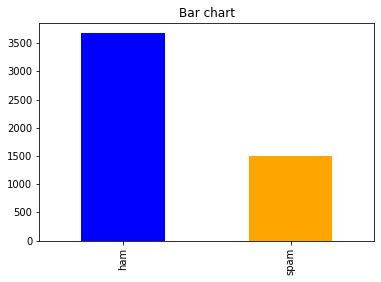

In [96]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

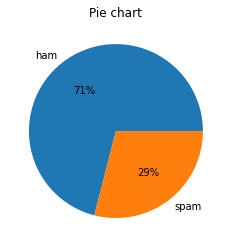

In [97]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [98]:
data.drop(['Unnamed: 0', 'label_num'],axis=1,inplace=True)
data.head(11)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [99]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '_TemplateMetaclass',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [100]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
def remove_punctuation(text):
    remove_punc=''.join([char for char in text if char not in string.punctuation])
    return remove_punc
data['remove_punc']=data['text'].apply(lambda row : remove_punctuation(row))
data.head()

,label,text,remove_punc
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...


In [102]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 
data['tokenized_text']=data['remove_punc'].apply(lambda row : tokenize(row.lower()))
data.head()

,label,text,remove_punc,tokenized_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,..."


In [103]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
#stopwords[:5]

def remove_stopwords(text):
    stopwords_cleaning=[word for word in text if word not in stopwords]
    return stopwords_cleaning 

stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [104]:
data['stopwords_cleaning']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,remove_punc,tokenized_text,stopwords_cleaning
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p..."


In [105]:
bannedWord = ['subject']
def remove_bannedWord(stopwords_cleaning):
    bannedword_cleaning=[word for word in stopwords_cleaning if word not in bannedWord]
    return bannedword_cleaning 
data['bannedword_cleaning']=data['stopwords_cleaning'].apply(lambda row : remove_bannedWord(row))
data.head()

,label,text,remove_punc,tokenized_text,stopwords_cleaning,bannedword_cleaning
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,..."
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven..."


In [106]:
ps = nltk.PorterStemmer()
dir(ps)
def stemming(bannedword_cleaning):
    stemmed_text=[ps.stem(word) for word in bannedword_cleaning]
    return stemmed_text
    
data['stemmed_text']=data.bannedword_cleaning.apply(lambda row : stemming(row))
data[['text','stemmed_text']].head()

,text,stemmed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,"[enron, methanol, meter, 988291, follow, note,..."
1,"Subject: hpl nom for january 9 , 2001\r\n( see...","[hpl, nom, januari, 9, 2001, see, attach, file..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...","[neon, retreat, ho, ho, ho, around, wonder, ti..."
3,"Subject: photoshop , windows , office . cheap ...","[photoshop, window, offic, cheap, main, trend,..."
4,Subject: re : indian springs\r\nthis deal is t...,"[indian, spring, deal, book, teco, pvr, revenu..."


In [107]:
def get_final_text(stemmed_text):
    final_text=" ".join([word for word in stemmed_text])
    return final_text
data['final_text']=data.stemmed_text.apply(lambda row : get_final_text(row))
data.head()

,label,text,remove_punc,tokenized_text,stopwords_cleaning,bannedword_cleaning,stemmed_text,final_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,...","[enron, methanol, meter, 988291, follow, note,...",enron methanol meter 988291 follow note gave m...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi...","[hpl, nom, januari, 9, 2001, see, attach, file...",hpl nom januari 9 2001 see attach file hplnol ...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,...","[neon, retreat, ho, ho, ho, around, wonder, ti...",neon retreat ho ho ho around wonder time year ...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren...","[photoshop, window, offic, cheap, main, trend,...",photoshop window offic cheap main trend abas d...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven...","[indian, spring, deal, book, teco, pvr, revenu...",indian spring deal book teco pvr revenu unders...


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [109]:
count1 = Counter(" ".join(data[data['label']=='ham']["final_text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["final_text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

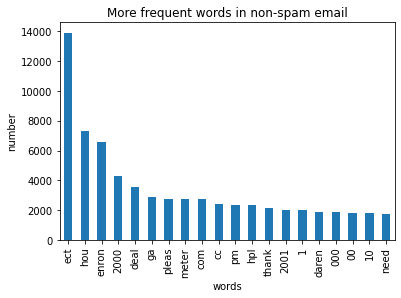

In [110]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam email')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

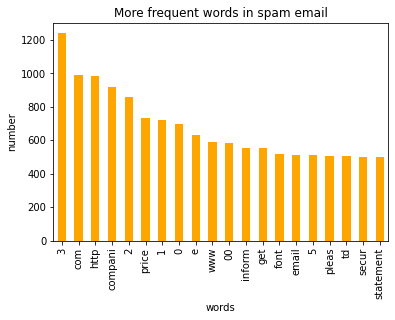

In [111]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam email')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [112]:
f = feature_extraction.text.CountVectorizer()
X = f.fit_transform(data["final_text"])
np.shape(X)

(5171, 42637)

In [113]:
data["label"]=data["label"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.2, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(4136, 42637), (1035, 42637)]


*MULTINOMIAL NAIVE BAYES CLASSIFIER*

In [114]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [115]:
list_alpha = np.arange(1/100000, 20, 1)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [116]:
  matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
  models = pd.DataFrame(data = matrix, columns = 
              ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
  models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.992505,0.974879,0.959044,0.952542
1,1.00001,0.986219,0.974879,0.965870,0.946488
2,2.00001,0.984526,0.975845,0.962457,0.952703
3,3.00001,0.983317,0.978744,0.962457,0.962457
4,4.00001,0.981383,0.977778,0.948805,0.972028
5,5.00001,0.978240,0.974879,0.935154,0.975089
6,6.00001,0.976306,0.971014,0.921502,0.974729
7,7.00001,0.973404,0.965217,0.901024,0.974170
8,8.00001,0.970986,0.962319,0.883959,0.981061
9,9.00001,0.968085,0.958454,0.870307,0.980769


In [117]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             19.000010
Train Accuracy     0.941248
Test Accuracy      0.927536
Test Recall        0.747440
Test Precision     0.995455
Name: 19, dtype: float64

In [118]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])

,Predicted Ham,Predicted Spam
Actual Ham,741,1
Actual Spam,74,219


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.75      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035



In [120]:
from sklearn.metrics import accuracy_score
Y_predMNBC = bayes.predict(X_test)
acc_valMNBC = accuracy_score(y_test,Y_predMNBC)
re_valMNBC = recall_score(y_test,Y_predMNBC)
pre_valMNBC = precision_score(y_test,Y_predMNBC)
f1_valMNBC = f1_score(y_test,Y_predMNBC)
predMNBC = acc_valMNBC*100
print("Accuracy score MNBC: %.0f"%predMNBC,"%")

Accuracy score MNBC: 93 %


*SUPPORT VECTOR MACHINE*

In [121]:
list_C = np.arange(1/100000, 20, 1) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [122]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.708414,0.716908,0.000000,0.000000
1,1.00001,0.976064,0.955556,0.962457,0.889590
2,2.00001,0.978482,0.954589,0.965870,0.884375
3,3.00001,0.981383,0.957488,0.965870,0.892744
4,4.00001,0.984043,0.958454,0.965870,0.895570
5,5.00001,0.985493,0.959420,0.962457,0.900958
6,6.00001,0.987186,0.964251,0.982935,0.900000
7,7.00001,0.987427,0.961353,0.979522,0.894081
8,8.00001,0.988878,0.962319,0.979522,0.896875
9,9.00001,0.989845,0.965217,0.982935,0.902821


In [123]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 19.000010
Train Accuracy     0.993472
Test Accuracy      0.966184
Test Recall        0.972696
Test Precision     0.913462
Name: 19, dtype: float64

In [124]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])

,Predicted Ham,Predicted Spam
Actual Ham,715,27
Actual Spam,8,285


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       742
           1       0.91      0.97      0.94       293

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [126]:
from sklearn.metrics import accuracy_score
Y_predSVM = svc.predict(X_test)
acc_valSVM = accuracy_score(y_test,Y_predSVM)
re_valSVN = recall_score(y_test,Y_predSVM)
pre_valSVM = precision_score(y_test,Y_predSVM)
f1_valSVM = f1_score(y_test,Y_predSVM)
predSVM = acc_valSVM*100
print("Accuracy score SVM: %.0f" %predSVM, "%")

Accuracy score SVM: 97 %


*RECURRENT NEURAL NETWORK*

In [127]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
np.random.seed(7)
import pandas as pd


In [128]:
len(data['final_text'])

5171

In [129]:
data.head()

,label,text,remove_punc,tokenized_text,stopwords_cleaning,bannedword_cleaning,stemmed_text,final_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter 988291\r\nthis...,"[subject, enron, methanol, meter, 988291, this...","[subject, enron, methanol, meter, 988291, foll...","[enron, methanol, meter, 988291, follow, note,...","[enron, methanol, meter, 988291, follow, note,...",enron methanol meter 988291 follow note gave m...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom for january 9 2001\r\n see at...,"[subject, hpl, nom, for, january, 9, 2001, see...","[subject, hpl, nom, january, 9, 2001, see, att...","[hpl, nom, january, 9, 2001, see, attached, fi...","[hpl, nom, januari, 9, 2001, see, attach, file...",hpl nom januari 9 2001 see attach file hplnol ...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat\r\nho ho ho we re aroun...,"[subject, neon, retreat, ho, ho, ho, we, re, a...","[subject, neon, retreat, ho, ho, ho, around, w...","[neon, retreat, ho, ho, ho, around, wonderful,...","[neon, retreat, ho, ho, ho, around, wonder, ti...",neon retreat ho ho ho around wonder time year ...
3,1,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m...","[photoshop, windows, office, cheap, main, tren...","[photoshop, window, offic, cheap, main, trend,...",photoshop window offic cheap main trend abas d...
4,0,Subject: re : indian springs\r\nthis deal is t...,Subject re indian springs\r\nthis deal is to ...,"[subject, re, indian, springs, this, deal, is,...","[subject, indian, springs, deal, book, teco, p...","[indian, springs, deal, book, teco, pvr, reven...","[indian, spring, deal, book, teco, pvr, revenu...",indian spring deal book teco pvr revenu unders...


In [130]:
len(data['final_text'])

5171

In [131]:
data['final_text'].head()

0    enron methanol meter 988291 follow note gave m...
1    hpl nom januari 9 2001 see attach file hplnol ...
2    neon retreat ho ho ho around wonder time year ...
3    photoshop window offic cheap main trend abas d...
4    indian spring deal book teco pvr revenu unders...
Name: final_text, dtype: object

In [132]:
data['label'].unique()

array([0, 1])

In [133]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 500

tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['final_text'].values)
X = tokenizer.texts_to_sequences(data['final_text'].values)
X = pad_sequences(X, maxlen=max_words);

In [134]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(data['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (4136, 500)
input_test shape: (1035, 500)


In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

model_RNN = Sequential()
model_RNN.add(Embedding(10000, 32))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(2, activation='sigmoid'))
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_RNN = model_RNN.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=512, #sekali proses jln 512
                    verbose=1,
                    validation_split=0.2,
                    validation_data=(X_test, Y_test))

Epoch 1/5
7/7 [==============================] - 4s 360ms/step - loss: 0.6767 - acc: 0.6123 - val_loss: 0.6259 - val_acc: 0.7101
Epoch 2/5
7/7 [==============================] - 2s 318ms/step - loss: 0.6086 - acc: 0.7199 - val_loss: 0.5627 - val_acc: 0.7802
Epoch 3/5
7/7 [==============================] - 2s 321ms/step - loss: 0.5498 - acc: 0.7718 - val_loss: 0.5985 - val_acc: 0.6171
Epoch 4/5
7/7 [==============================] - 2s 322ms/step - loss: 0.6112 - acc: 0.5848 - val_loss: 0.5824 - val_acc: 0.6280
Epoch 5/5
7/7 [==============================] - 2s 320ms/step - loss: 0.5545 - acc: 0.6840 - val_loss: 0.4821 - val_acc: 0.8297


In [136]:
loss_RNN, acc_RNN = model_RNN.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

33/33 [==============================] - 1s 24ms/step - loss: 0.4833 - acc: 0.8338
Accuracy: 83.38 %
Loss: 48.33 %


In [137]:
from sklearn.metrics import confusion_matrix
Y_pred = model_RNN.predict(X_test)
m_confusion_test = metrics.confusion_matrix(Y_test.argmax(axis=1),Y_pred.argmax(axis=1))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])

,Predicted Ham,Predicted Spam
Actual Ham,598,144
Actual Spam,28,265


In [138]:
from sklearn.metrics import classification_report
Y_pred = model_RNN.predict(X_test)
print(classification_report(Y_test.argmax(axis=1),Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.81      0.87       742
           1       0.65      0.90      0.75       293

    accuracy                           0.83      1035
   macro avg       0.80      0.86      0.81      1035
weighted avg       0.87      0.83      0.84      1035



In [139]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
Y_predRNN = model_RNN.predict(X_test)
acc_valRNN = accuracy_score(Y_test.argmax(axis=1),Y_predRNN.argmax(axis=1))
re_valRNN = recall_score(Y_test.argmax(axis=1),Y_predRNN.argmax(axis=1))
pre_valRNN = precision_score(Y_test.argmax(axis=1),Y_predRNN.argmax(axis=1))
f1_valRNN = f1_score(Y_test.argmax(axis=1),Y_predRNN.argmax(axis=1))
predRNN = (acc_valRNN*100)
print("Accuracy score RNN: %.0f" %predRNN, "%")


Accuracy score RNN: 83 %


In [140]:
import pandas as pd

daftarAccurancy = pd.DataFrame({'Number':[1,2,3],
                                'Algorithm':['MNBC','SVM','RNN'],
                                'Accurancy':[predMNBC,predSVM,predRNN],
                                'Recall' : [re_valMNBC,re_valSVN,re_valRNN],
                                'Precision' : [pre_valMNBC,pre_valSVM,pre_valRNN],
                                'F1-Score' : [f1_valMNBC,f1_valSVM,f1_valRNN],
                                'Accurancy in %':['%.0f%%' %predMNBC,'%.0f%%' %predSVM,'%.0f%%' %predRNN]})
daftarAccurancy

,Number,Algorithm,Accurancy,Recall,Precision,F1-Score,Accurancy in %
0,1,MNBC,92.753623,0.747440,0.995455,0.853801,93%
1,2,SVM,96.618357,0.972696,0.913462,0.942149,97%
2,3,RNN,83.381643,0.904437,0.647922,0.754986,83%


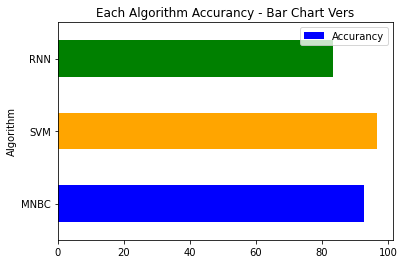

In [141]:
daftarAccurancy.plot.barh(x='Algorithm',y='Accurancy', color= ["blue", "orange", "green"], title='Each Algorithm Accurancy - Bar Chart Vers')
plt.show()

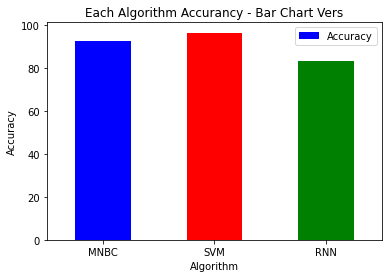

In [142]:
df = pd.DataFrame({'Algorithm':['MNBC', 'SVM', 'RNN'], 'Accuracy':[predMNBC, predSVM, predRNN], 'Acc':[predMNBC, predSVM, predRNN]})
ax = df.plot.bar(x='Algorithm', y='Accuracy', ylabel='Accuracy', rot=0, color= ["blue", "red", "green"], title='Each Algorithm Accurancy - Bar Chart Vers')